In [1]:
import numpy as np
import pandas as pd

In [2]:
data_dir = '/home/donald/Homework/9.26/Anuran_Calls_(MFCCs)/anuran_data.csv'
df = pd.read_csv(data_dir)

In [3]:
df.sample(3)

,Unnamed: 0,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,labels
2655,2655,1.0,0.347139,0.381465,0.538759,0.134316,-0.000815,-0.034167,0.083649,0.288394,...,-0.172389,-0.258070,0.131008,0.133632,-0.087104,-0.122463,-0.055540,0.085973,0.193022,8
4224,4224,1.0,0.161972,0.185300,0.467311,0.055418,-0.061862,-0.118924,0.116187,0.353304,...,-0.121469,-0.274534,0.069707,0.205625,-0.012080,-0.129188,-0.121251,0.083246,0.186970,8
7023,7023,1.0,0.372349,0.314135,0.251507,-0.012689,0.034633,0.161027,0.058385,-0.068520,...,0.043635,0.023802,-0.023407,-0.010057,0.013783,0.017942,0.008164,0.002055,-0.000482,0


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
y = df.labels.values
num_class = len(np.unique(y))

In [6]:
y = np.reshape(y, (-1, 1))

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc = OneHotEncoder()

In [9]:
enc.fit(y)
y = enc.transform(y).toarray()
y.shape

(7195, 10)

In [10]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc87a247c50>,
      dtype=object)

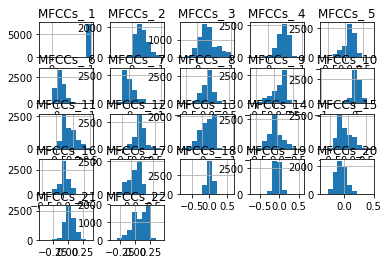

In [11]:
df.iloc[:,0:22].hist()

In [12]:
from sklearn.preprocessing import normalize
X = normalize(df.iloc[:,0:22].values)
X.shape

(7195, 22)

In [13]:
import tensorflow as tf

In [14]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Softmax

Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(Dense(20, input_shape=(22,)))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                460       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_7 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                410       
Total params: 3,350
Trainable params: 3,350
Non-trainable params: 0
_________________________________________________________________


In [20]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(train_X, train_y, batch_size=128, epochs=100)

Epoch 1/100
4317/4317 [==============================] - 0s 59us/step - loss: 2.0446 - acc: 0.3945
Epoch 2/100
4317/4317 [==============================] - 0s 14us/step - loss: 1.5521 - acc: 0.4948
Epoch 3/100
4317/4317 [==============================] - 0s 15us/step - loss: 1.2172 - acc: 0.5888
Epoch 4/100
4317/4317 [==============================] - 0s 14us/step - loss: 1.0089 - acc: 0.6910
Epoch 5/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.8711 - acc: 0.7246
Epoch 6/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.7643 - acc: 0.7498
Epoch 7/100
4317/4317 [==============================] - 0s 15us/step - loss: 0.6693 - acc: 0.7855
Epoch 8/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.6036 - acc: 0.8047
Epoch 9/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.5684 - acc: 0.8235
Epoch 10/100
4317/4317 [==============================] - 0s 15us/step - loss: 0.5389 - acc: 0.8272
Epoch 11/

4317/4317 [==============================] - 0s 15us/step - loss: 0.1493 - acc: 0.9571
Epoch 84/100
4317/4317 [==============================] - 0s 15us/step - loss: 0.1414 - acc: 0.9571
Epoch 85/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.1538 - acc: 0.9565
Epoch 86/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.1427 - acc: 0.9551
Epoch 87/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.1375 - acc: 0.9611
Epoch 88/100
4317/4317 [==============================] - 0s 13us/step - loss: 0.1420 - acc: 0.9620
Epoch 89/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.1374 - acc: 0.9583
Epoch 90/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.1407 - acc: 0.9558
Epoch 91/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.1367 - acc: 0.9595
Epoch 92/100
4317/4317 [==============================] - 0s 14us/step - loss: 0.1378 - acc: 0.9583
Epoch 93/100


In [22]:
model.evaluate(test_X, test_y)

2878/2878 [==============================] - 0s 26us/step


[0.101305956508941, 0.9732453092425295]